In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from project_root.dataset.protein_dataset import ProteinDataset
from project_root.utils.visualization import DataVisualizer
from project_root.dataset.wrapped_protein_dataset import WrappedProteinDataset

In [2]:
# Step 1: Load your base dataset (dummy or real for testing)
# For testing, simulate a minimal ProteinDataset-compatible object
class DummyProteinDataset(ProteinDataset):
    def __init__(self, n=10, d_embed=50, d_attn=100):
        self.embeddings = [np.random.rand(d_embed) for _ in range(n)]
        self.attention_weights = [np.random.rand(10, 10) for _ in range(n)]
        self.ids = np.array([[f"ID_{i}"] for i in range(n)])
        self.labels = np.array([[i % 2] for i in range(n)])
        self.additional_attributes = {
            'length': np.array([[np.random.randint(100, 300)] for _ in range(n)])
        }

    def get_embeddings(self):
        return self.embeddings

    def get_attention_weights(self):
        return self.attention_weights

    def get_ids(self):
        return self.ids

    def get_labels(self):
        return self.labels

    def get_attribute(self, name):
        return self.additional_attributes[name]

In [3]:

# Step 2: Wrap the dataset
dataset = DummyProteinDataset()
wrapped = WrappedProteinDataset(dataset, reduce_method='pca', pca_method='threshold', threshold=0.9)

Converting embeddings and attention weights to NumPy arrays...
Applying dimensionality reduction using pca...



--- Test Case 1: select_data({'embedding': True}) ---


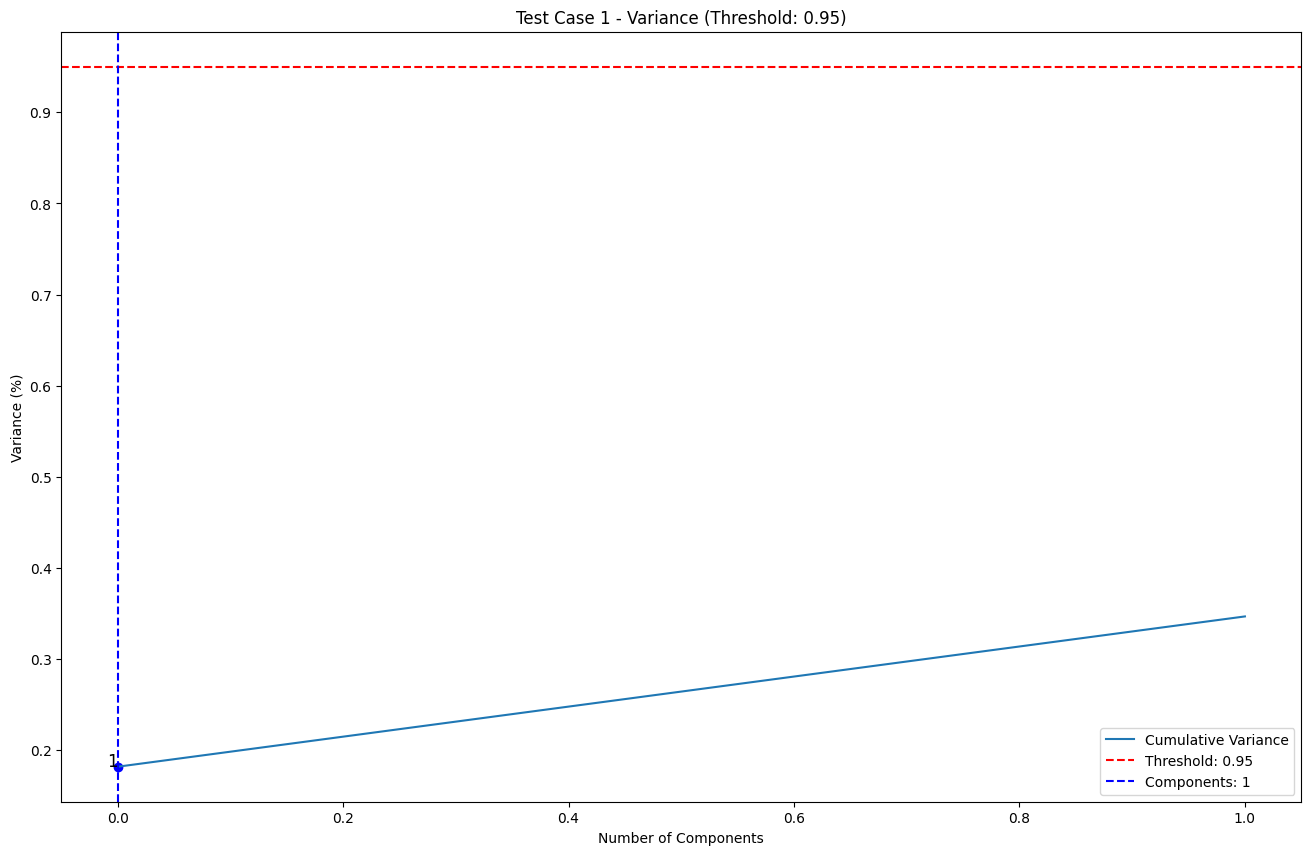

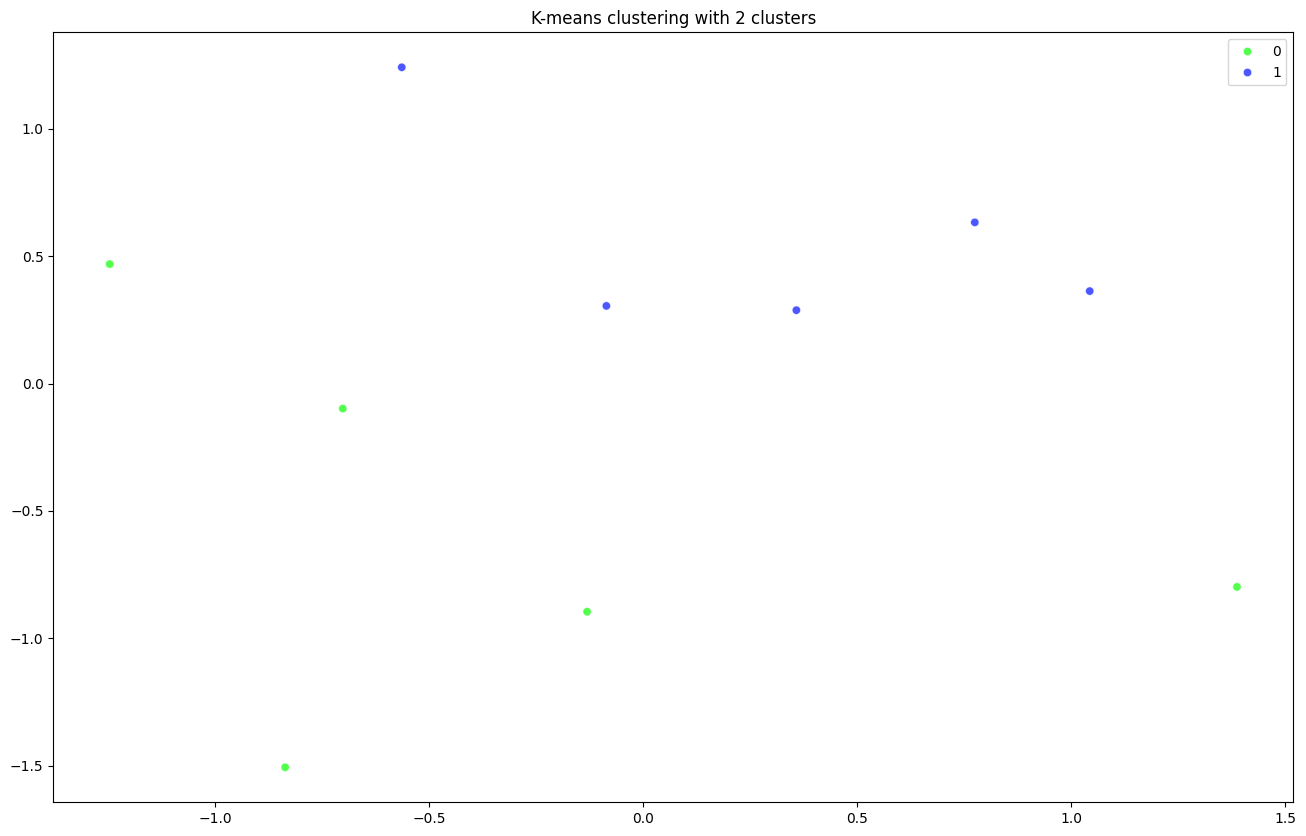

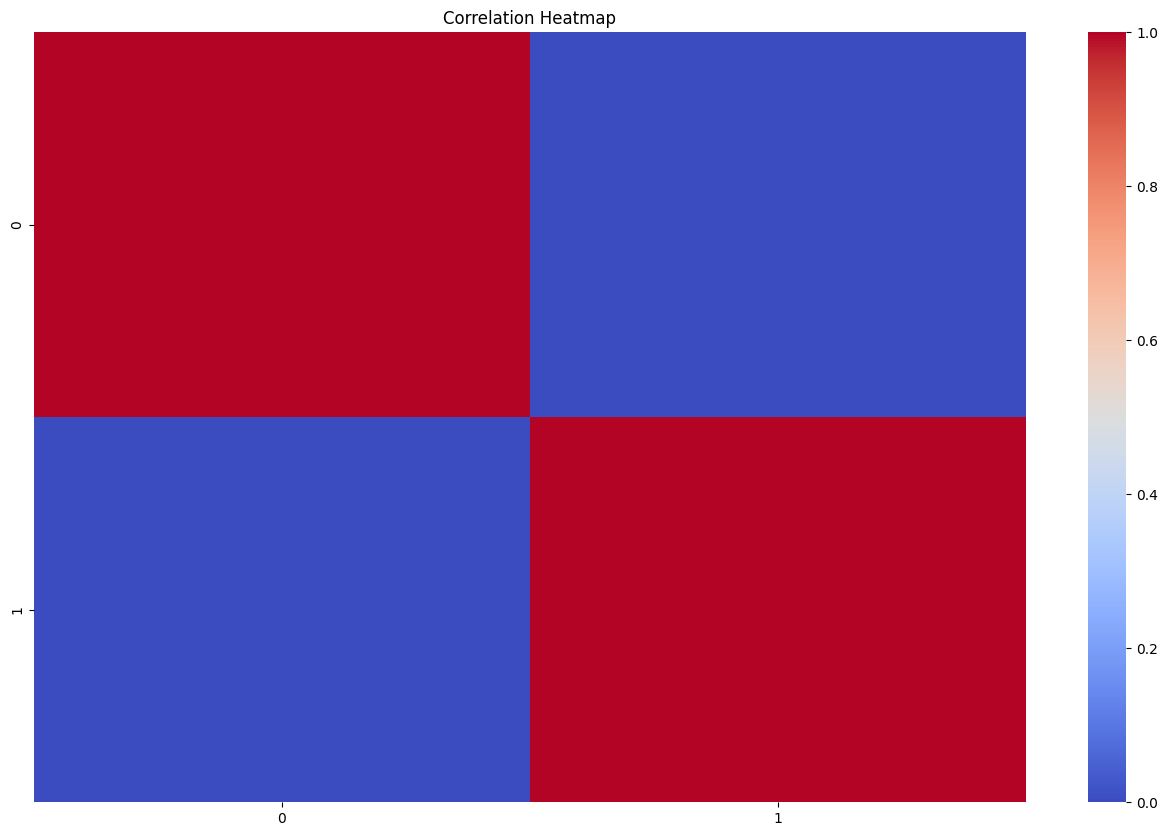


--- Test Case 2: select_data({'attention_weights': True}) ---


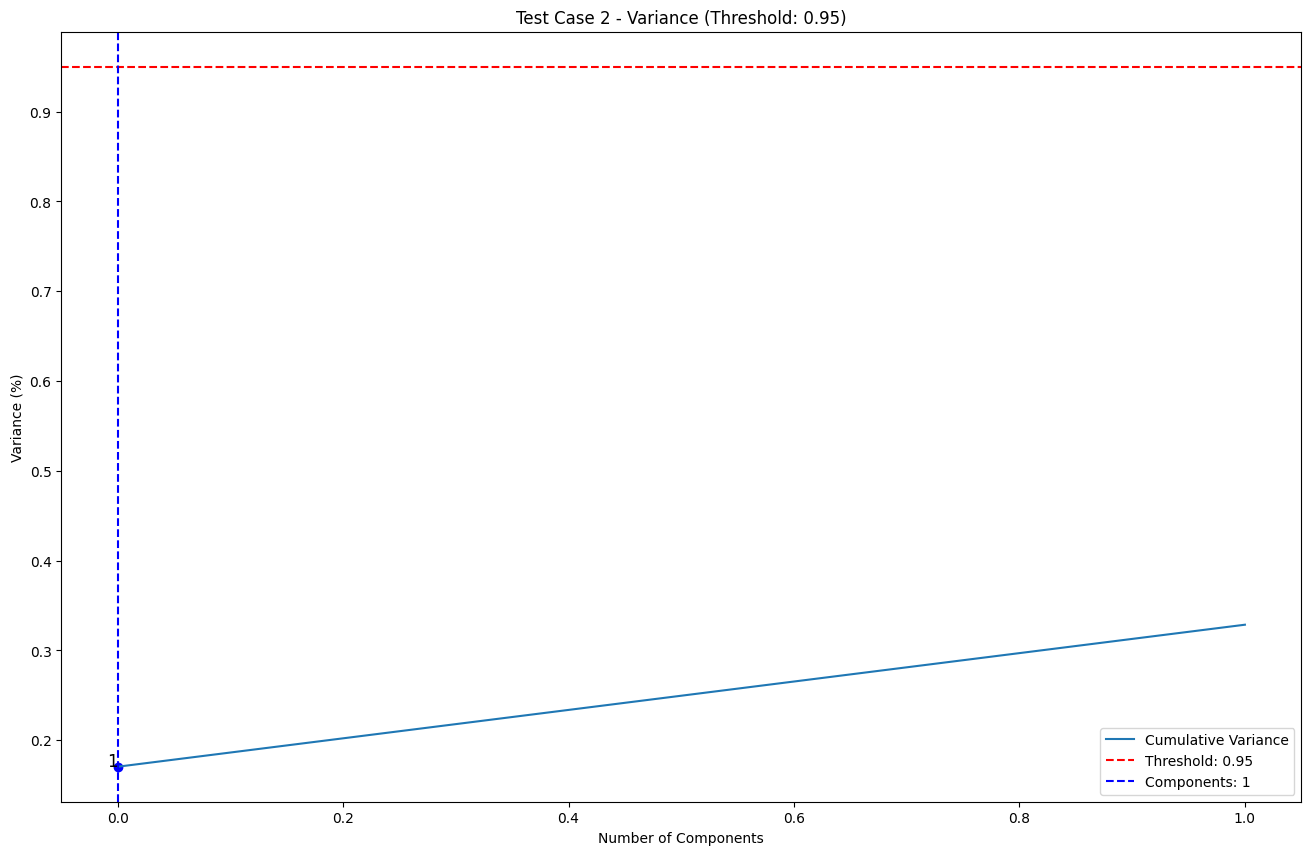

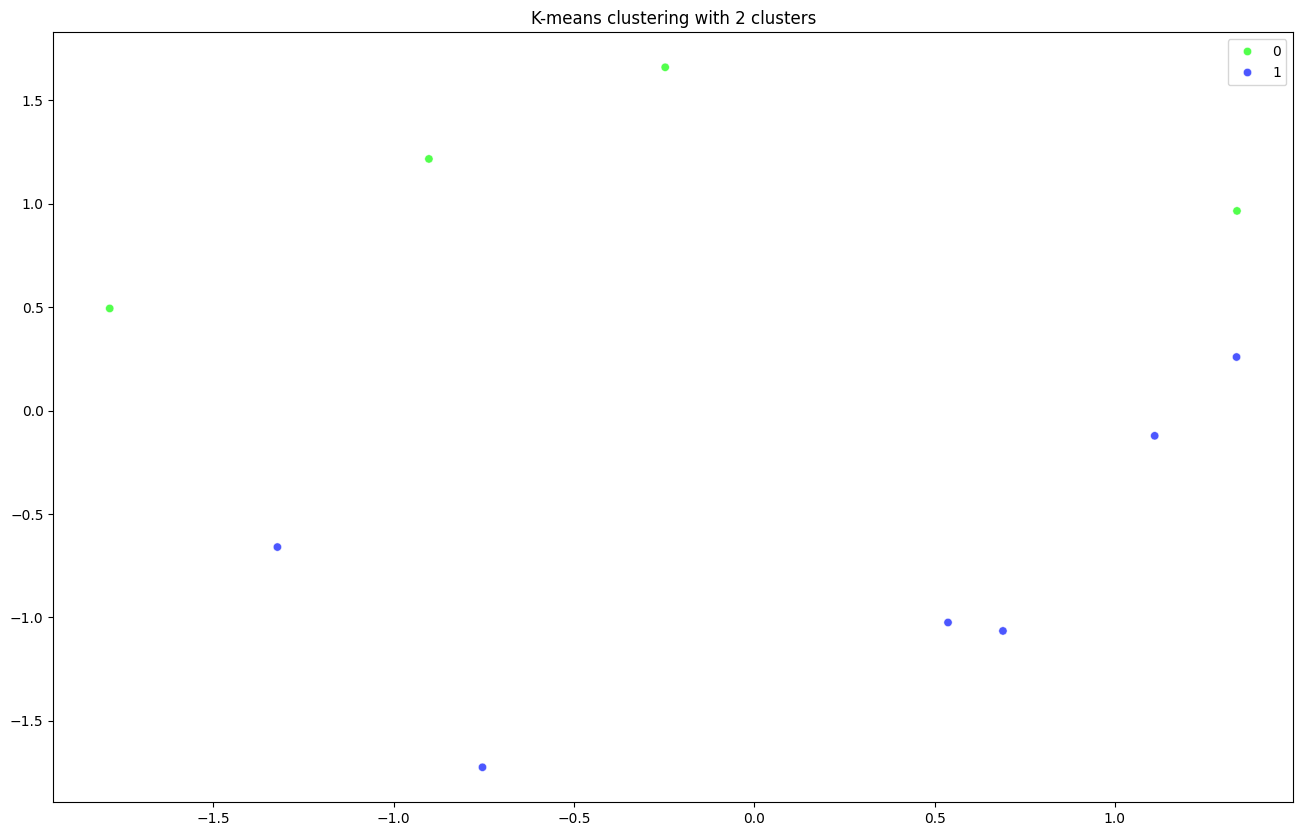

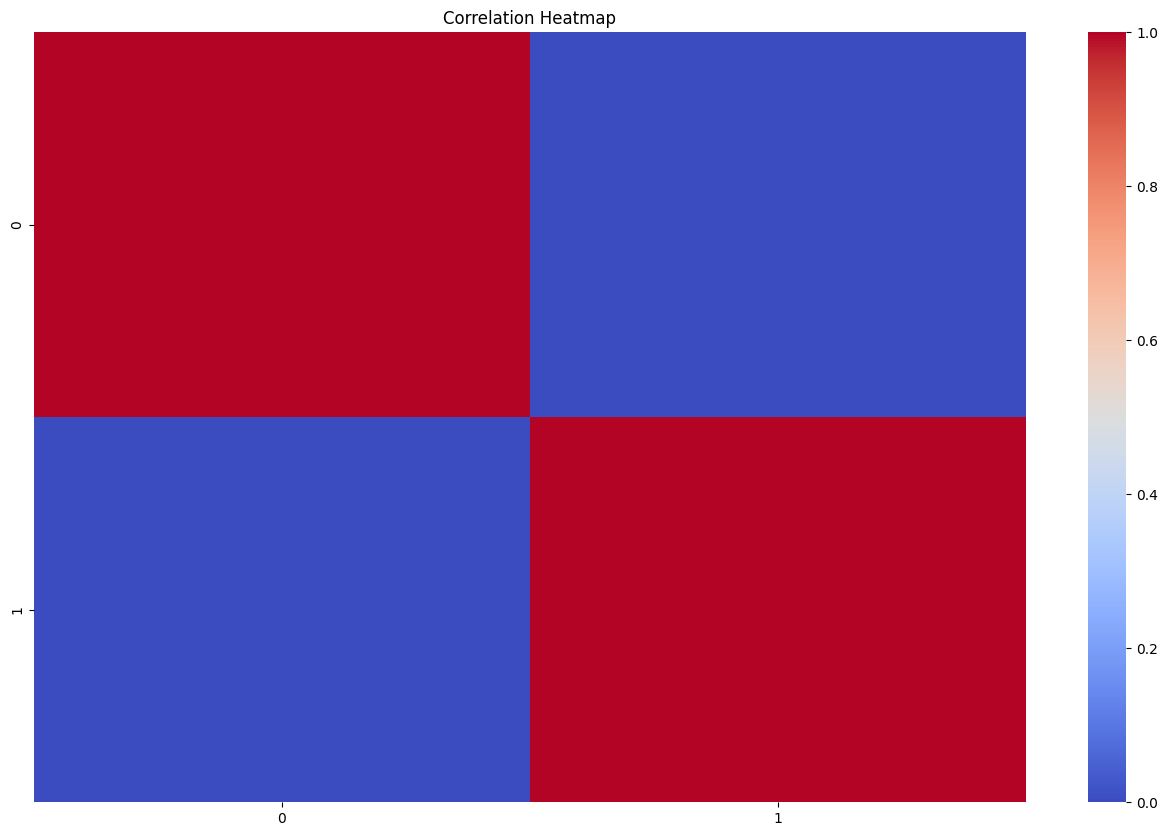


--- Test Case 3: select_data({'embedding': True, 'attention_weights': True}) ---


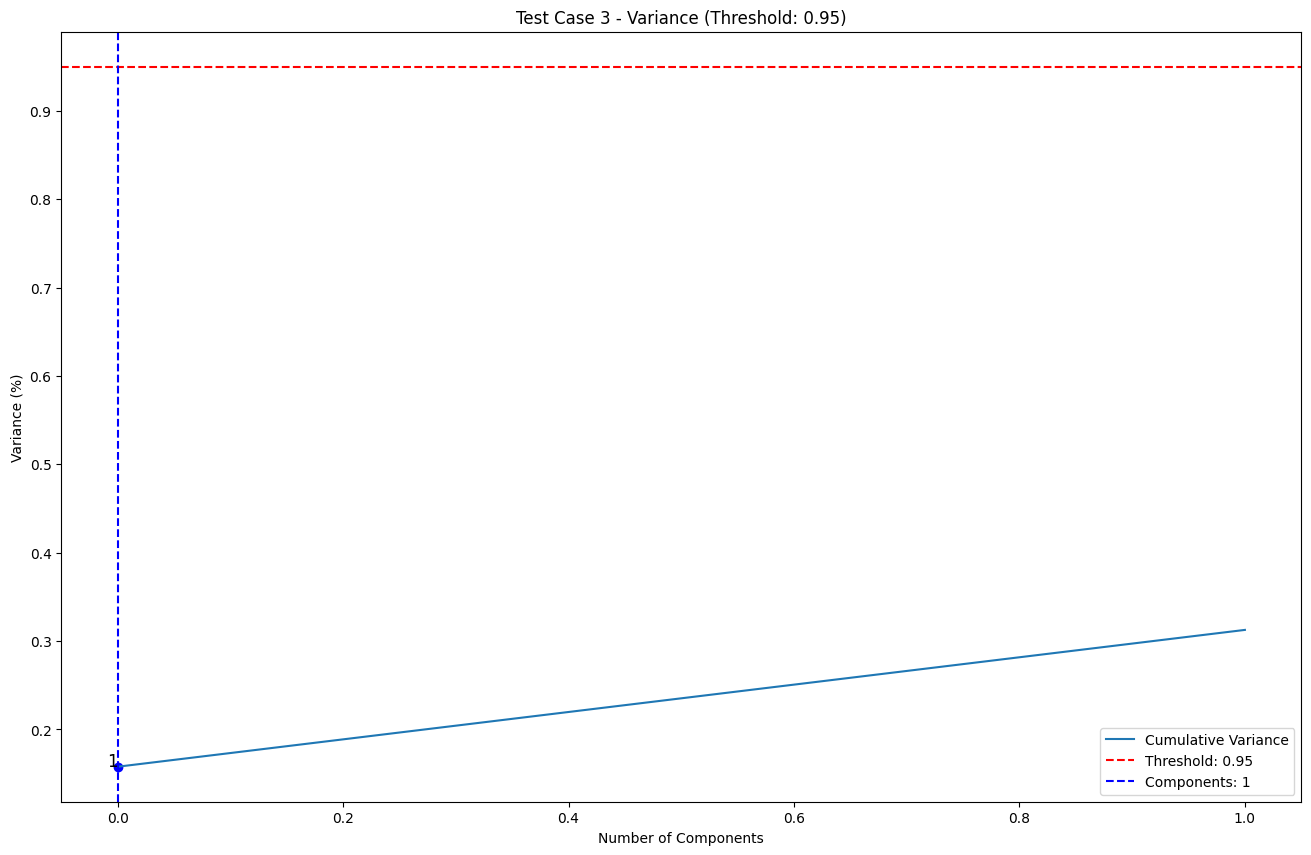

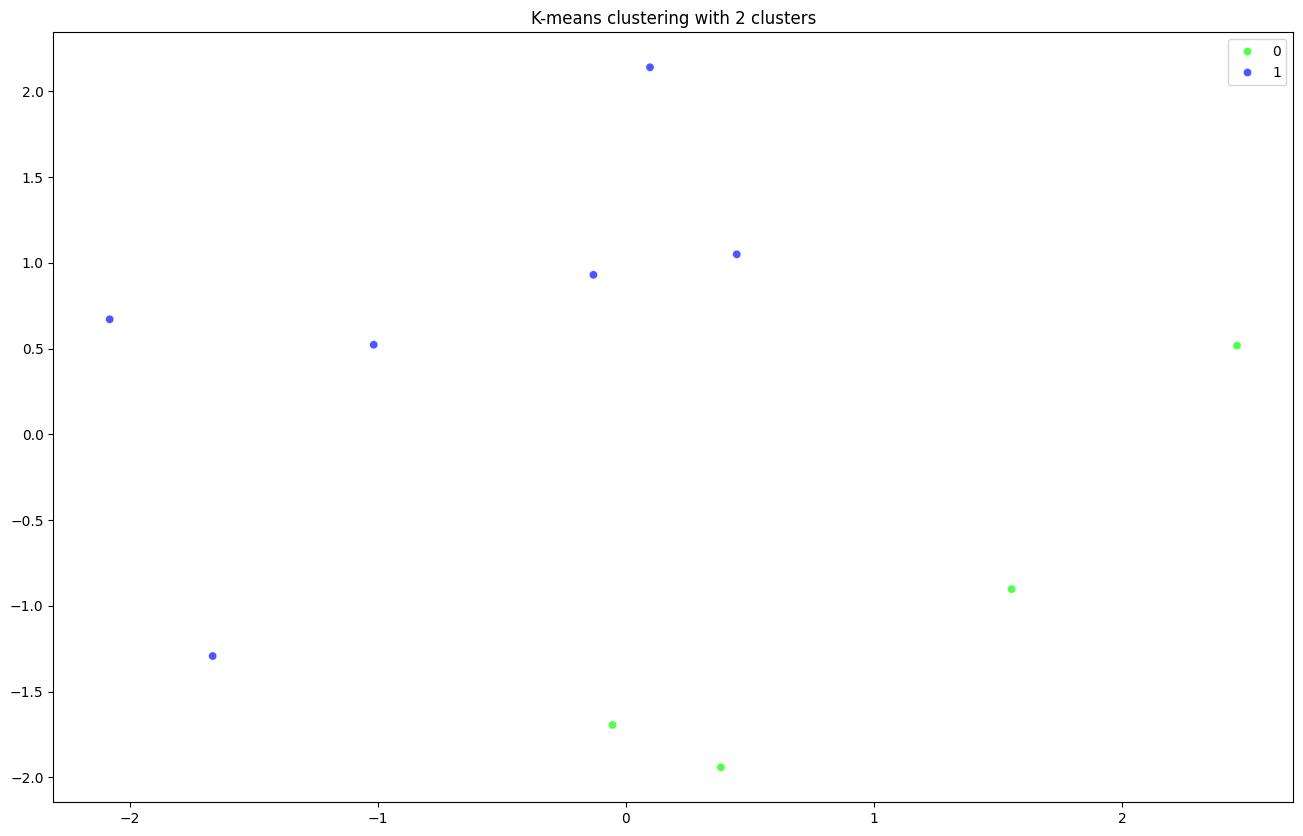

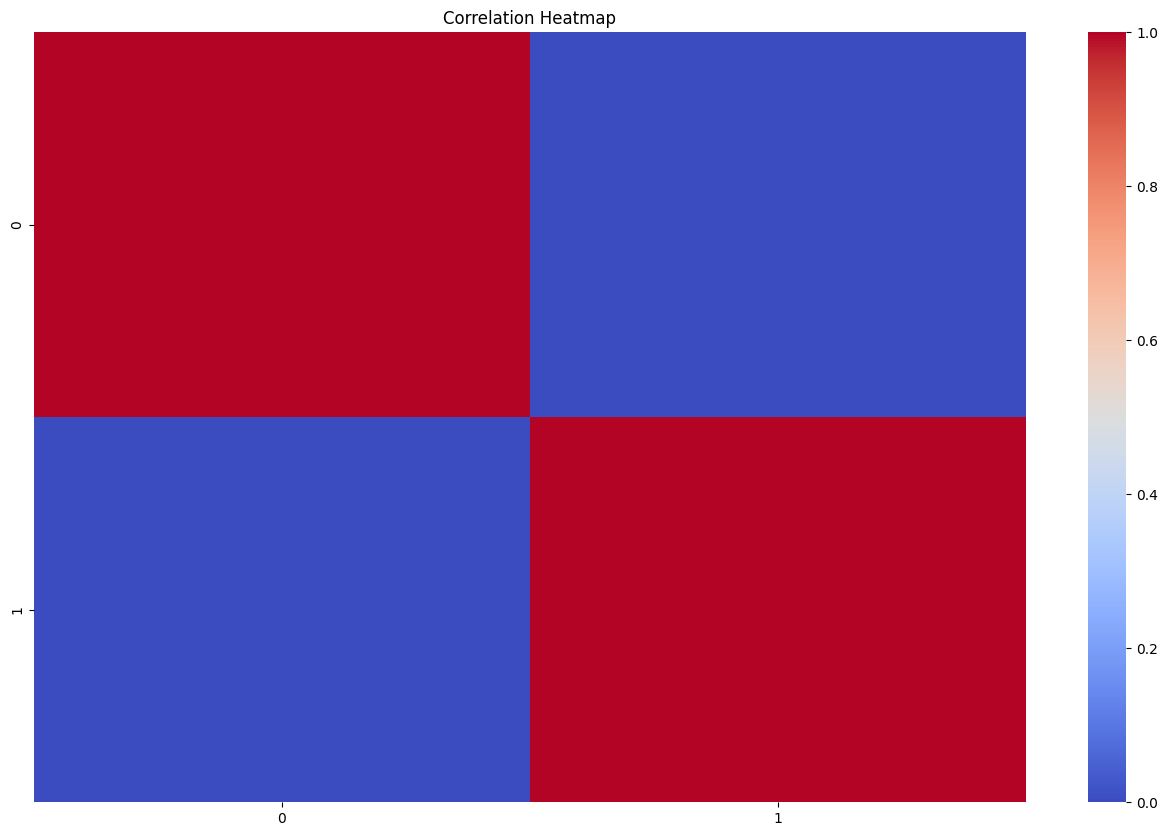


--- Test Case 4: select_data({'attention_weights': True, 'target_column': True}) ---


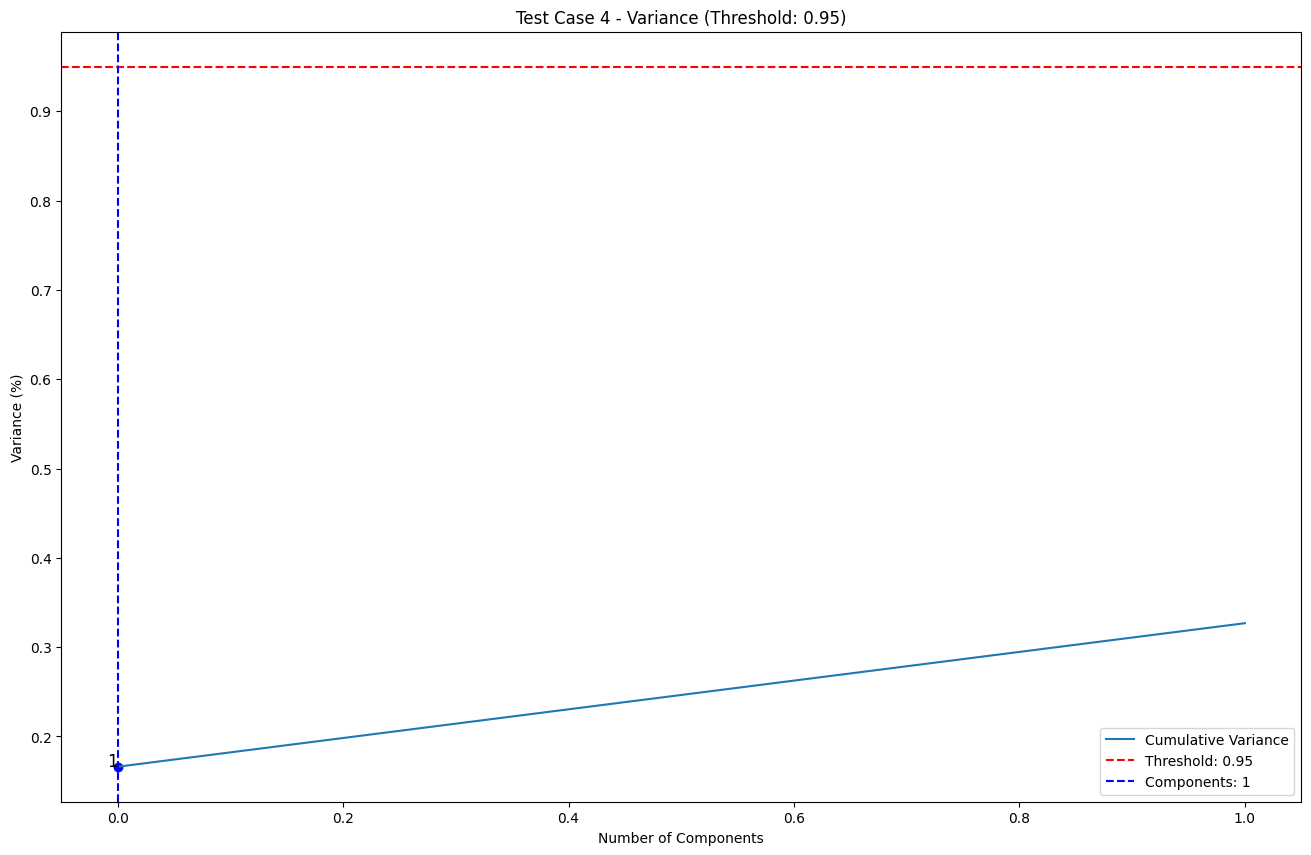

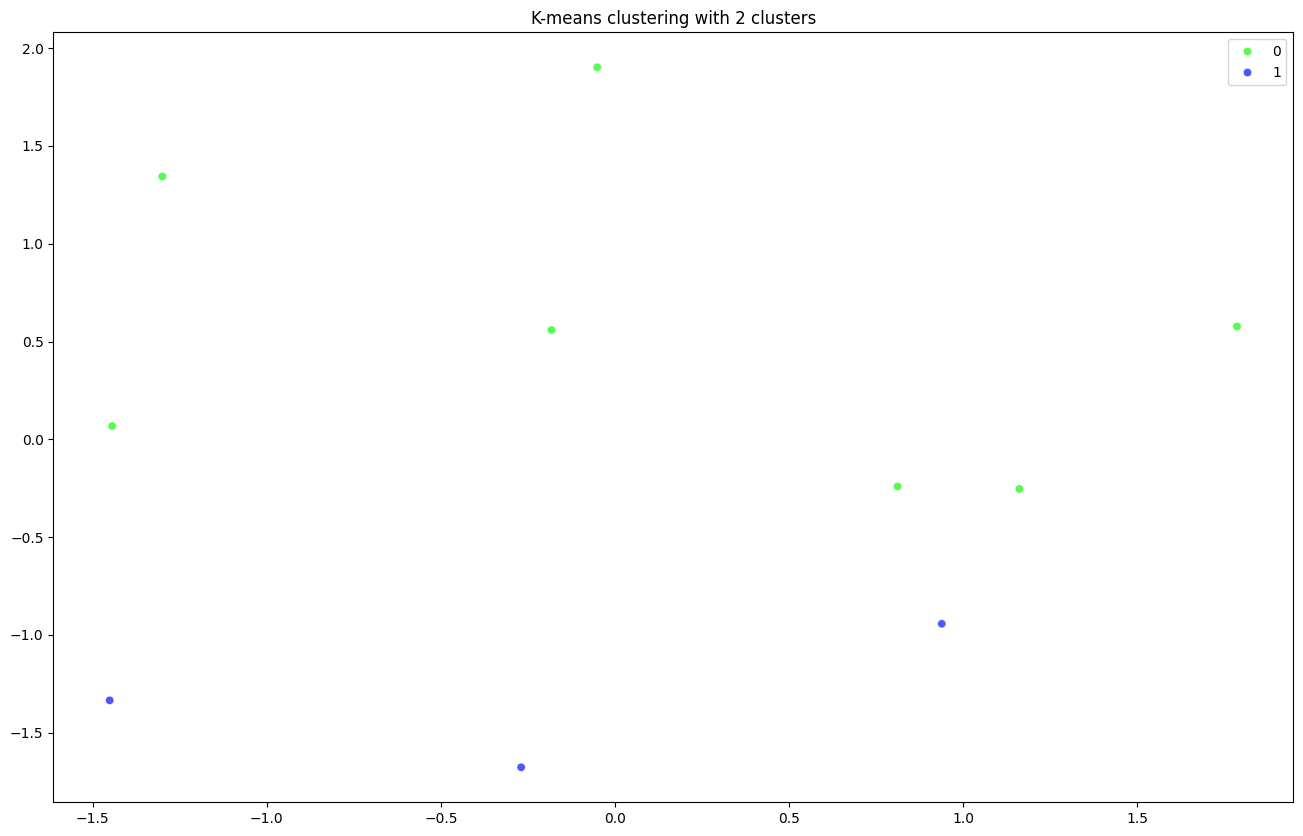

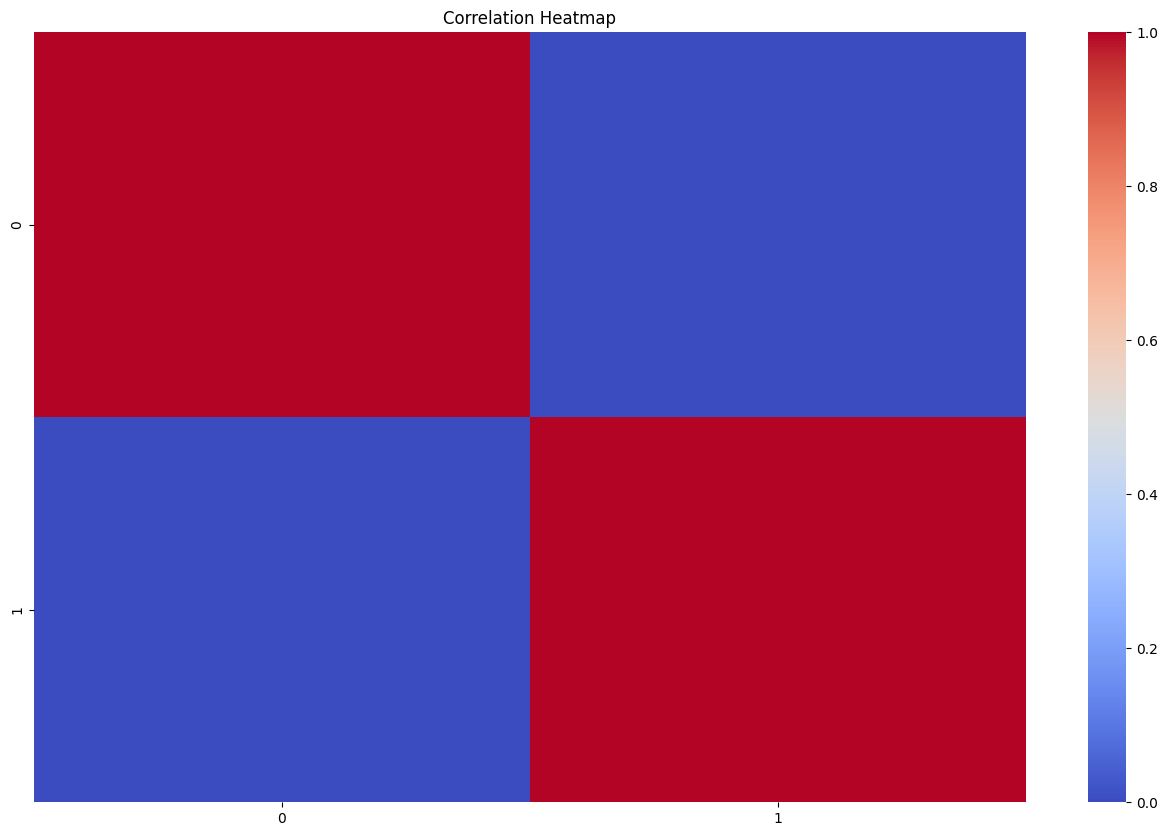


--- Test Case 5: select_data({'embedding': True, 'attention_weights': True, 'target_column': True}) ---


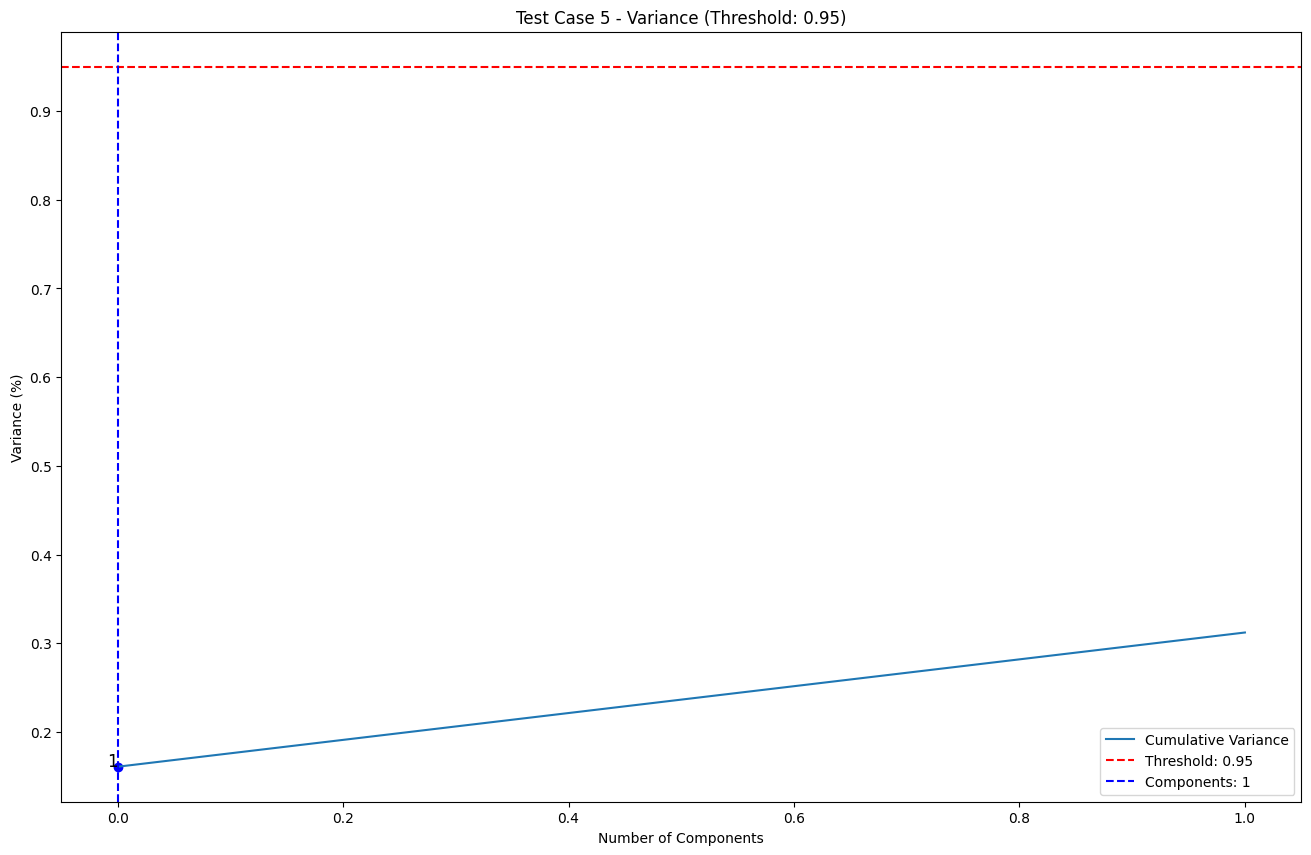

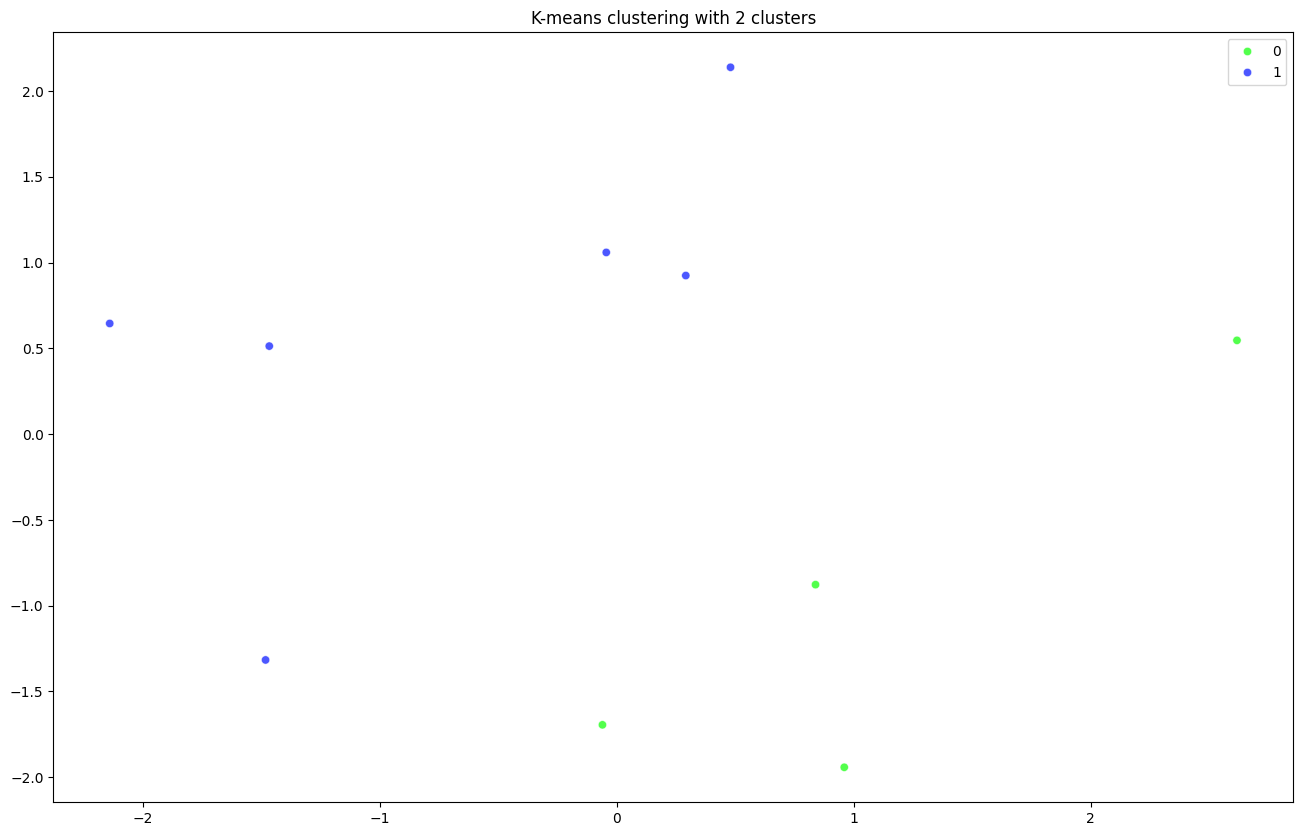

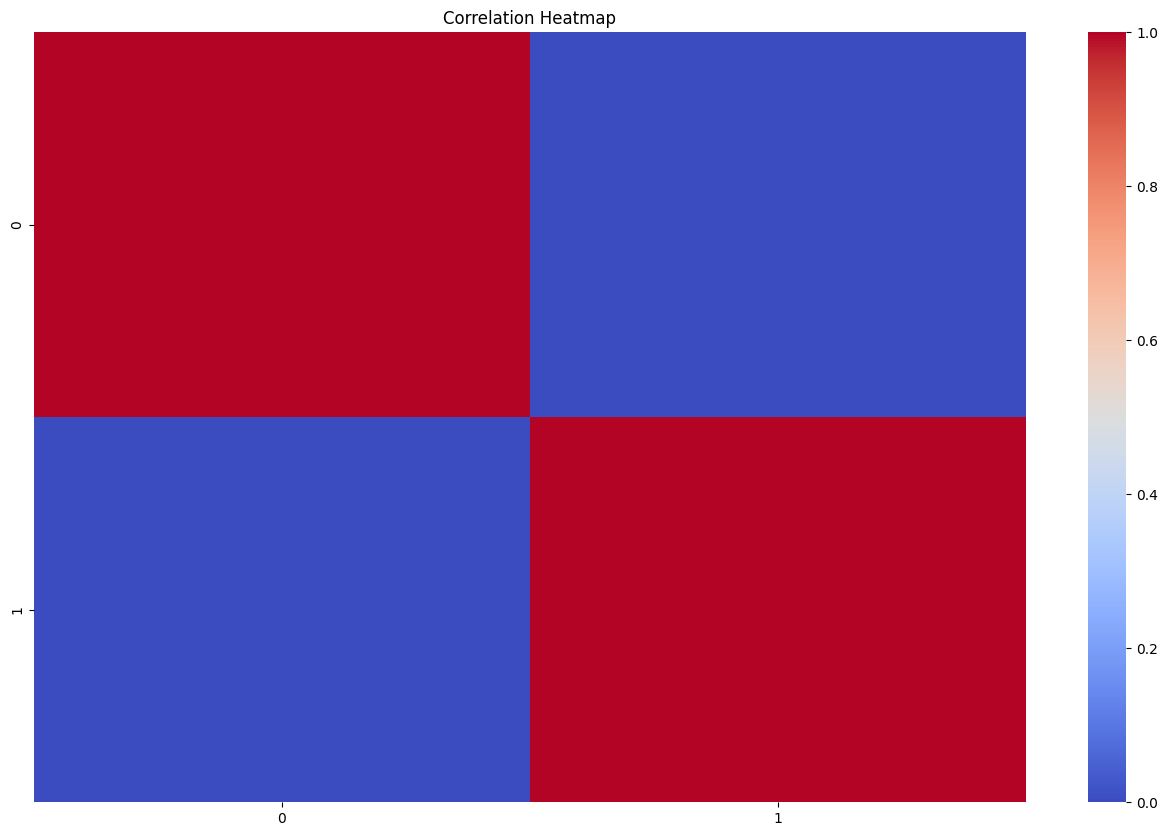


--- Test Case 6: select_data({'embedding': True, 'attention_weights': True, 'additional_columns': ['length']}) ---


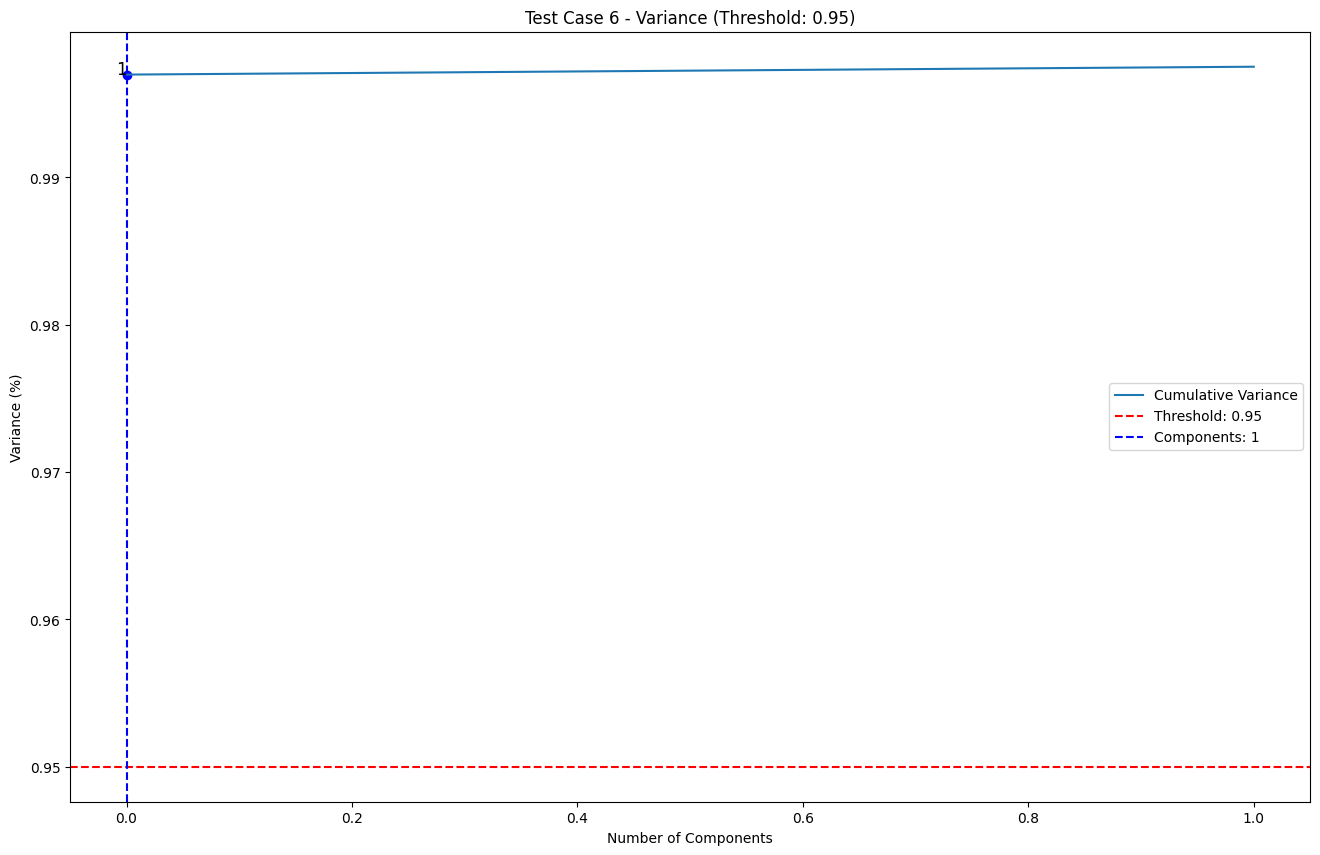

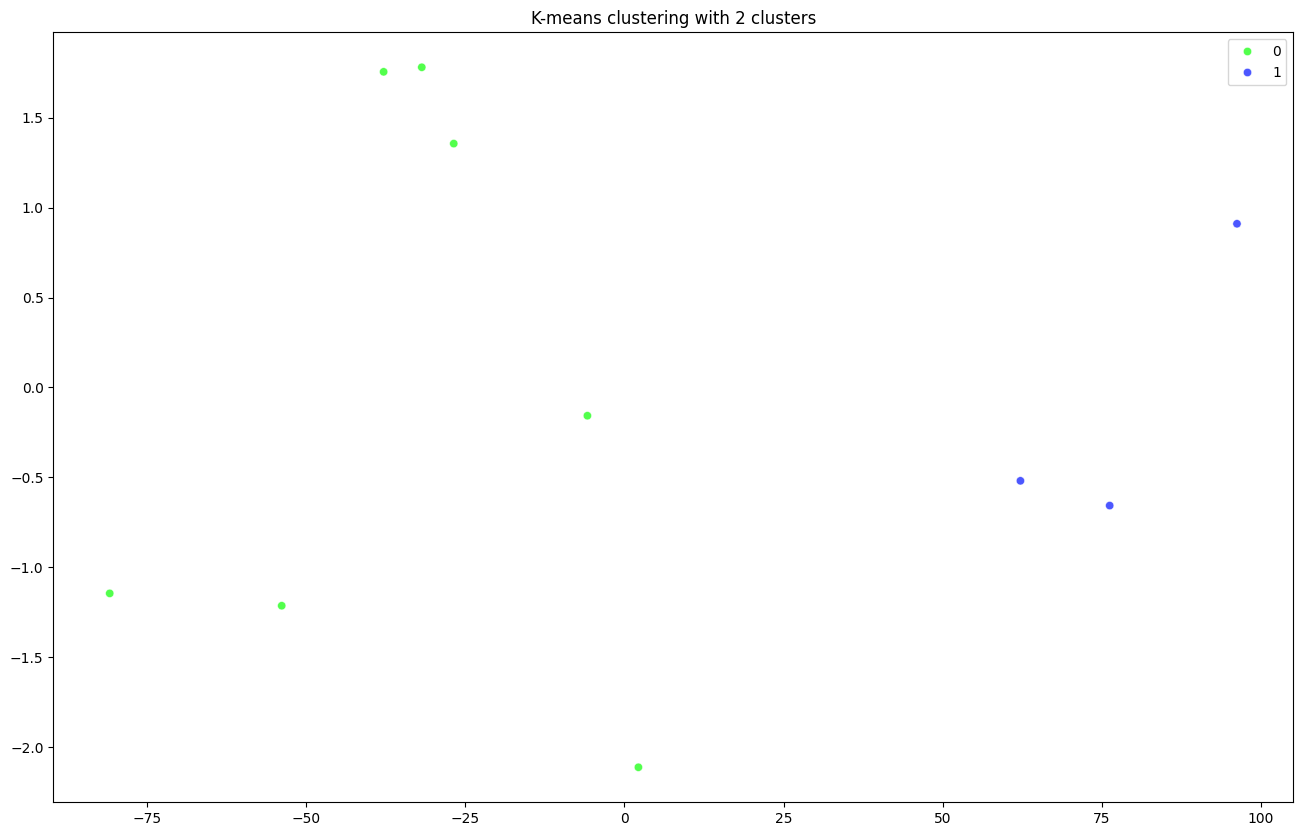

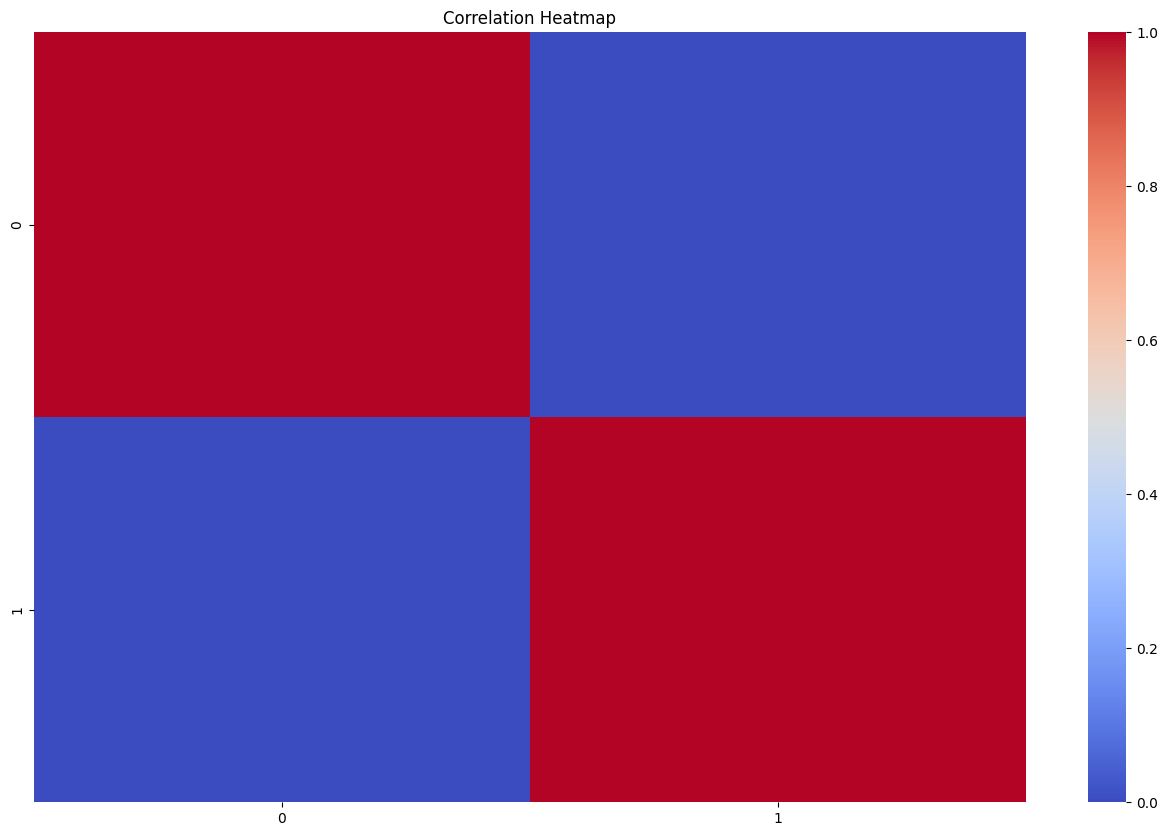

In [5]:
# Step 3: Test all select_data() combinations and run plots
def test_select_data_combinations():
    combinations = [
        {'embedding': True},
        {'attention_weights': True},
        {'embedding': True, 'attention_weights': True},
        {'attention_weights': True, 'target_column': True},
        {'embedding': True, 'attention_weights': True, 'target_column': True},
        {'embedding': True, 'attention_weights': True, 'additional_columns': ['length']},
    ]

    for i, combo in enumerate(combinations):
        print(f"\n--- Test Case {i+1}: select_data({combo}) ---")
        try:
            data = wrapped.select_data(**combo)
            if isinstance(data, list):
                data = np.array(data)
            if data.shape[1] > 2:
                # Reduce to 2D for plotting
                pca = PCA(n_components=2)
                reduced = pca.fit_transform(data)
                DataVisualizer.plot_variance_explained(pca, title=f"Test Case {i+1} - Variance")
                DataVisualizer.plot_kmeans(reduced, n_clusters=2)
                DataVisualizer.plot_correration_heatmap(reduced)
            else:
                print("Data too small for PCA or plotting.")
        except Exception as e:
            print(f"❌ Test Case {i+1} failed: {e}")

# Run the tests
test_select_data_combinations()